In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import cv2
import dlib
import pathlib

In [2]:
BASE_PATH = pathlib.Path('../data/mfr2')
labels_path = BASE_PATH / 'mfr2_labels.txt'
pairs_path = BASE_PATH / 'pairs.txt'

In [3]:
labels=pd.read_csv(filepath_or_buffer=str(labels_path))
labels=labels.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)
people=labels["person"].unique()

def get_indexes(person, mask=True):
    if mask:
        mask_filter = labels["mask"]!="no-mask"
    else:
        mask_filter = labels["mask"]=="no-mask"
    person_filter = labels["person"]==person
    return list(labels[person_filter & mask_filter]["index"])

pairs={person:list(zip(get_indexes(person,mask=True), get_indexes(person, mask=False))) for person in people}
masks={person:get_indexes(person,mask=True) for person in people}
no_masks={person:get_indexes(person,mask=False) for person in people}

In [4]:
person, (pair1, pair2) = list(pairs.items())[0]

In [5]:
path1 = BASE_PATH / person / f'{person}_{str(pair1[0]).rjust(4, "0")}.png'
path2 = BASE_PATH / person / f'{person}_{str(pair1[1]).rjust(4, "0")}.png'

In [6]:
#loading haarcascade_frontalface_default.xml
BASE_CASCADE = pathlib.Path('../haarcascades')
haarcascades = list(BASE_CASCADE.glob('*frontalface_default*'))+ list(BASE_CASCADE.glob('*profileface*'))
face_models = [(cv2.CascadeClassifier(str(c)), c.name) for c in haarcascades]
face_model = face_models[0][0]

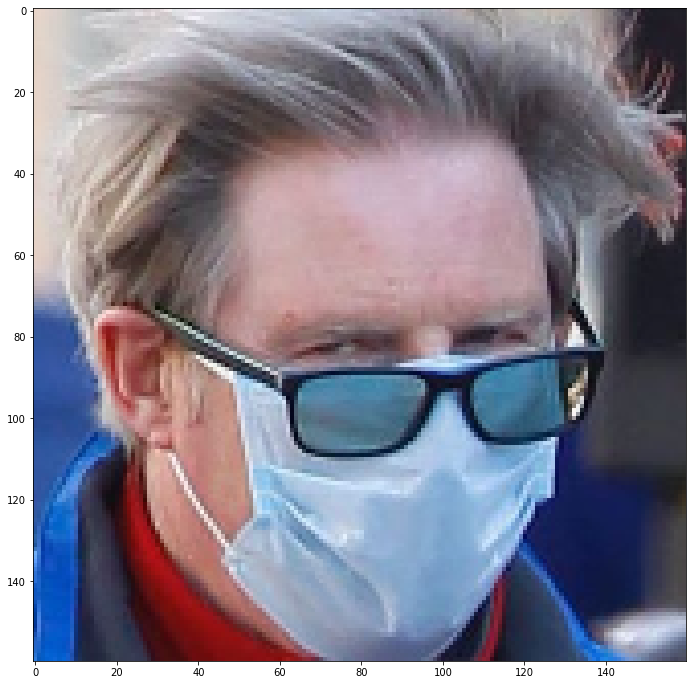

In [7]:
img = cv2.imread(str(path1))
gray = cv2.cvtColor(src=img, code=cv2.IMREAD_GRAYSCALE)
faces = face_model.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [8]:
haarcascades

[WindowsPath('../haarcascades/haarcascade_frontalface_default.xml'),
 WindowsPath('../haarcascades/haarcascade_profileface.xml')]

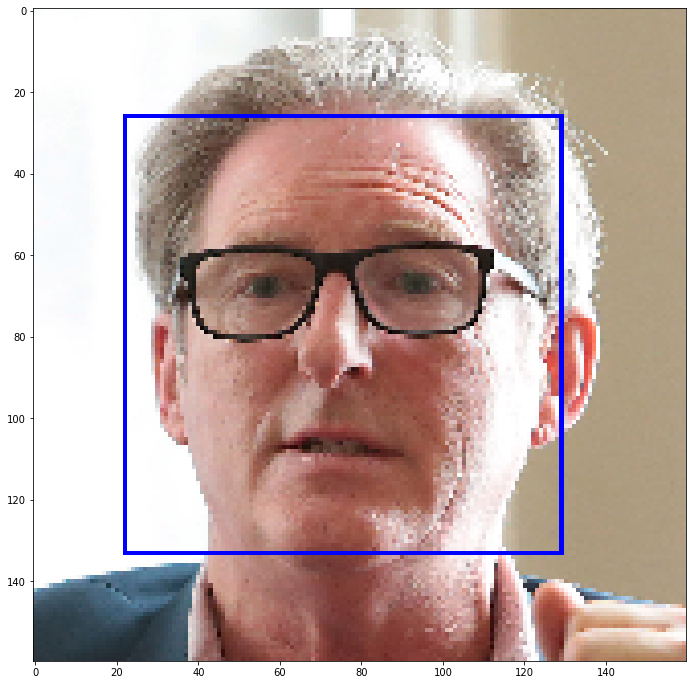

In [9]:
img = cv2.imread(str(path2))
gray = cv2.cvtColor(src=img, code=cv2.IMREAD_GRAYSCALE)
faces = face_model.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [18]:
results = []
phases=[[1.1, 4], [1.05, 3], [1.05, 2]]
# mask test

for dataset, mask in [[masks, 'mask'], [no_masks,'no-mask']]:
    for person, indexes in dataset.items():
        for index in indexes:
            path = BASE_PATH / person / f'{person}_{str(index).rjust(4, "0")}.png'
            img = cv2.imread(str(path))
            gray = cv2.cvtColor(src=img, code=cv2.IMREAD_GRAYSCALE)
            for idx, phase in enumerate(phases):
                for face_model, model_name in face_models:
                    faces = face_model.detectMultiScale(gray, scaleFactor=phase[0], minNeighbors=phase[1], minSize=[70, 70]) #returns a list of (x,y,w,h) tuples
                    if len(faces):
                        results.append([(person, index), len(faces) > 0, faces, mask, model_name, idx])
                        break
                else:
                    continue
                break
            else:
                results.append([(person, index), False, [], mask, 'None', 100])

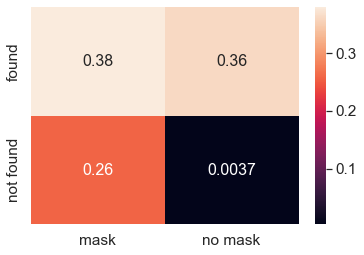

In [19]:
TP=len([x for x in results if x[1] and x[3] == 'mask']) / (len(results))
FN=len([x for x in results if x[1] and x[3] == 'no-mask']) / (len(results))
FP=len([x for x in results if not x[1] and x[3] == 'mask']) / (len(results))
TN=len([x for x in results if not x[1] and x[3] == 'no-mask']) / (len(results))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['found', 'not found'], ['mask', 'no mask'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

EricGarcetti 1 2
JaredPolis 4 2
NancyPelosi 6 2
PhilMurphy 3 2


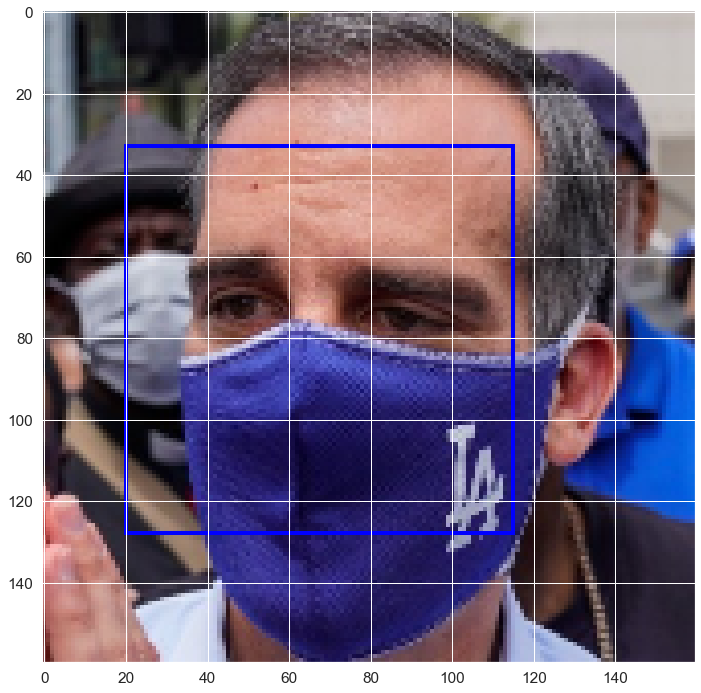

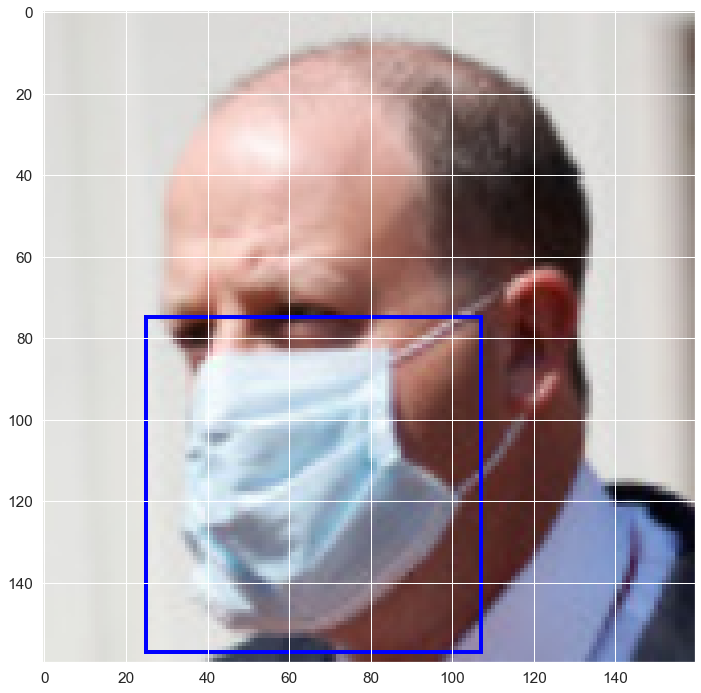

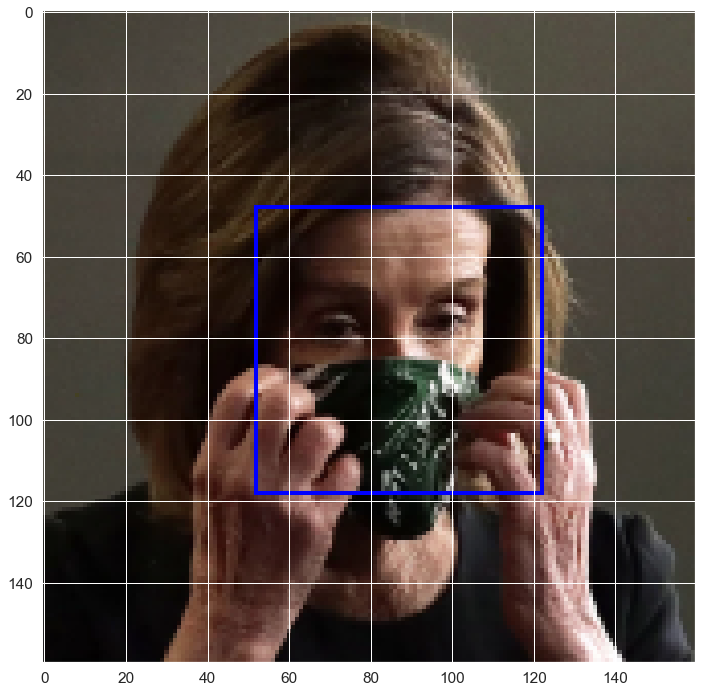

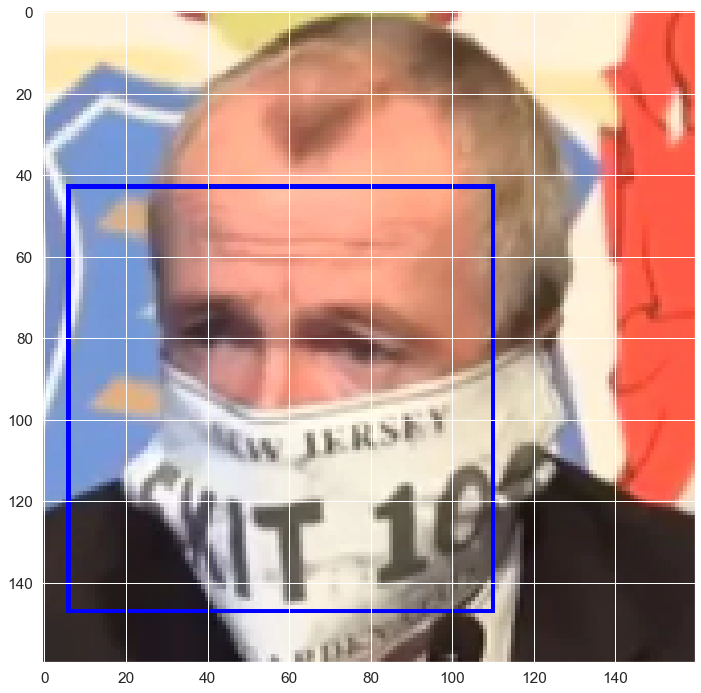

In [20]:
for x in [y for y in results if 100 > y[5] > 1][:5]:
    person, index = x[0]
    print(person, index, x[5])
    path = BASE_PATH / person / f'{person}_{str(index).rjust(4, "0")}.png'
    img = cv2.imread(str(path))
    gray = cv2.cvtColor(src=img, code=cv2.IMREAD_GRAYSCALE)
    out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    #plotting
    for (x,y,w,h) in x[2]:
        cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
    plt.figure(figsize=(12,12))
    plt.imshow(out_img)

In [13]:
faces

array([[  3,  28, 103, 103]], dtype=int32)

In [14]:
faces

array([[  3,  28, 103, 103]], dtype=int32)

In [15]:
len(faces)

1